<a href="https://colab.research.google.com/github/helloghostt/modu/blob/main/20240124_day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강조드리는것

1. AI/머신러닝 서비스에 대한 고민
2. 모델이 이렇게 만들어지는구나
3. 모델을 배포하려면 어떻게 해야할까?
4. 파이썬을 이렇게 활용할수도 있겠구나
5. 분석가와 PM들과 친해져야겠구나... ㅎㅎ

# 1. 의사결정나무 -  winequality_red

In [1]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

# 다운받은 데이터를 코랩에서 불러오겠습니다.
wine = pd.read_csv('/content/sample_data/winequality_red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

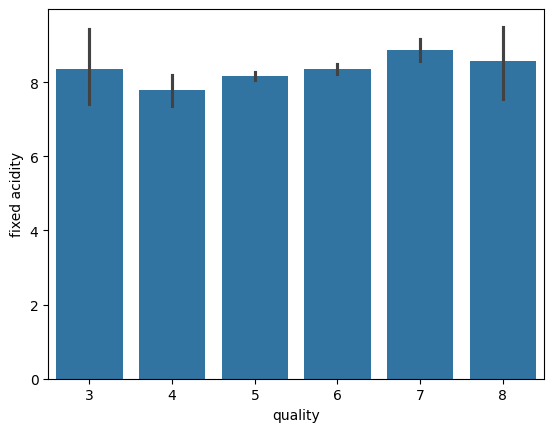

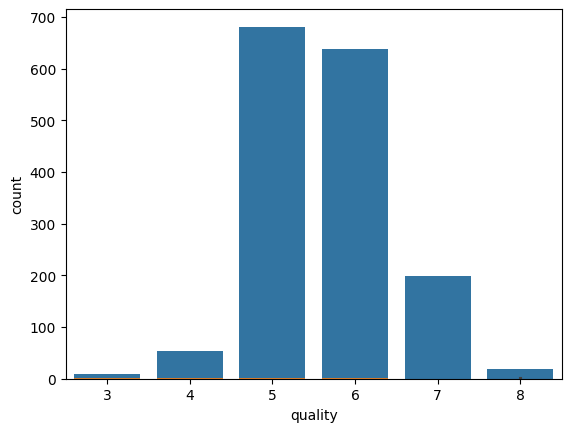

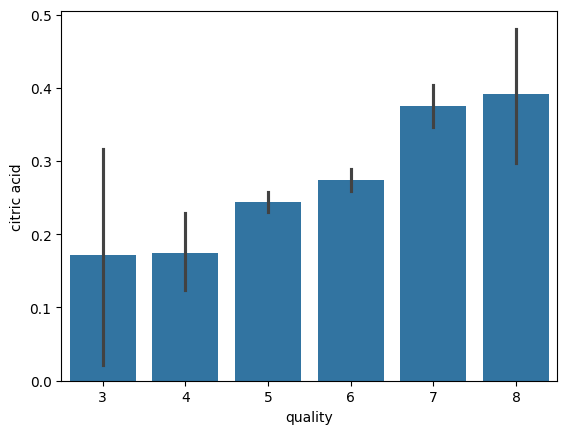

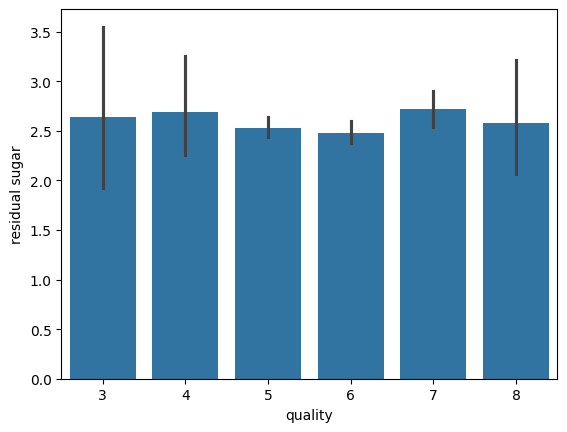

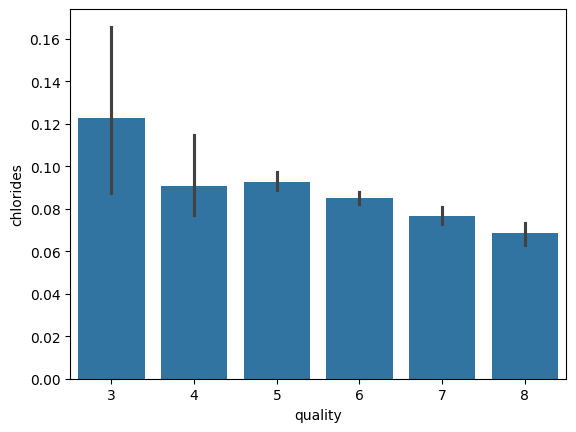

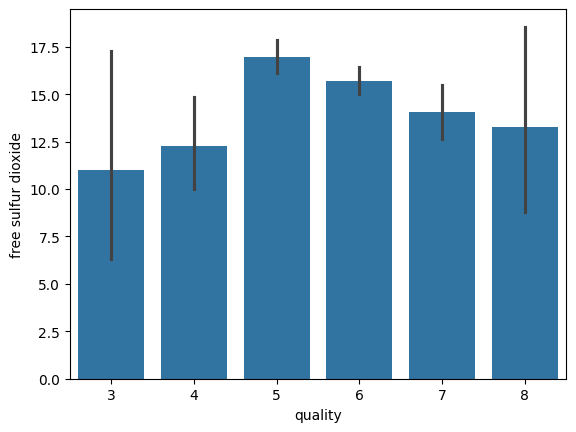

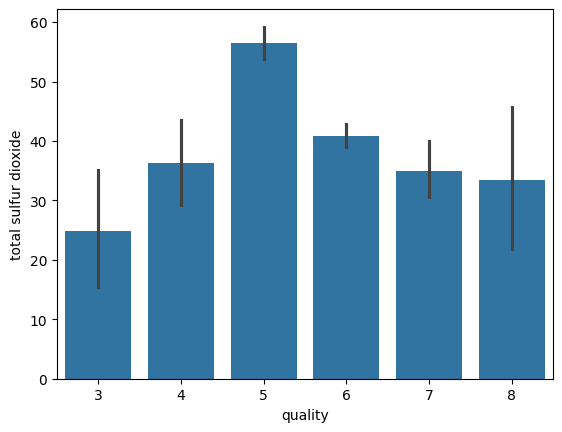

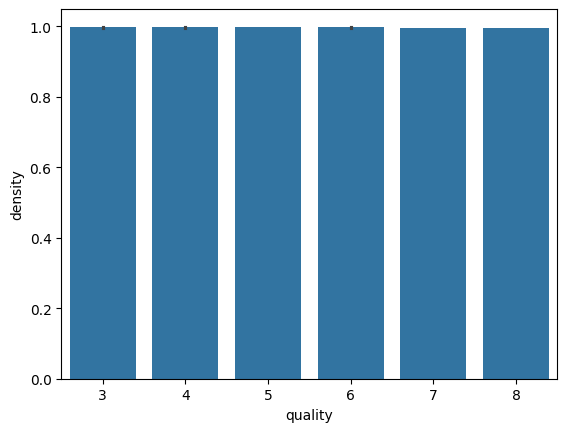

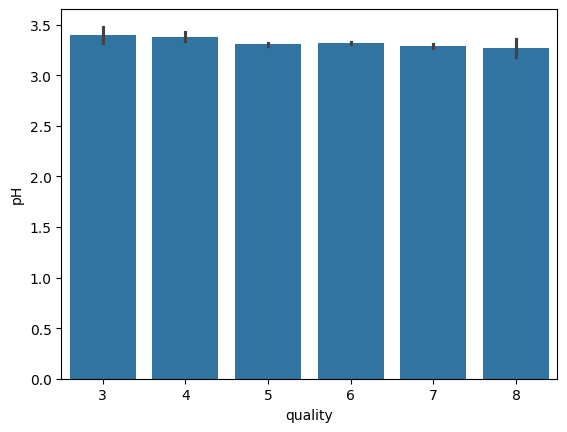

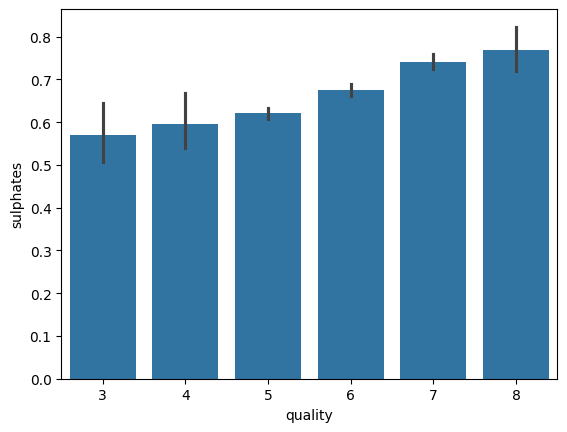

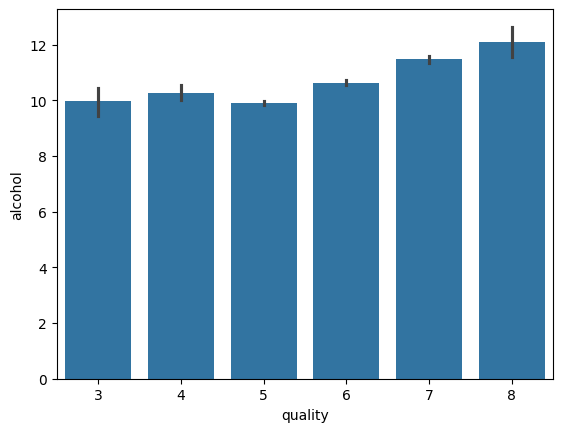

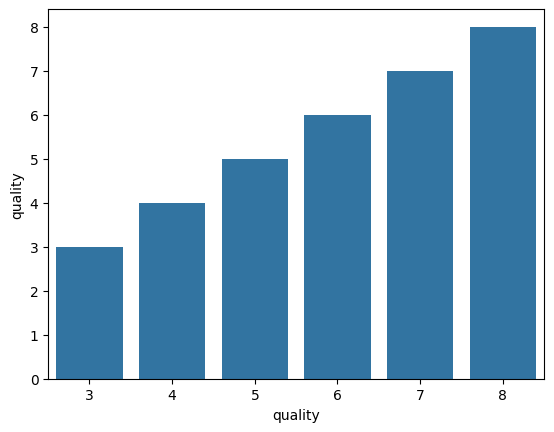

In [4]:
wine['quality'].unique()
sns.countplot(x='quality', data=wine)

# 특성별도 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

In [5]:
## 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [6]:
## Good/Bad는 인식할 수 없음. 따라서 이를 인식할 수 있도록 Label Encoding을 실시

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [7]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


## 측정 지표의 표준화.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [8]:
# 로지스틱 회귀
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


In [9]:
## SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:", metrics.precision_score(y_test, y_pred_svc))
print("Recall:", metrics.recall_score(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.2553191489361702


In [10]:
## KNN
model_knn = KNeighborsClassifier(5)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320

Accuracy: 0.875
Precision: 0.6129032258064516
Recall: 0.40425531914893614


In [11]:
## NB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
print(classification_report(y_test, y_pred_NB))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Precision:", metrics.precision_score(y_test, y_pred_NB))
print("Recall:", metrics.recall_score(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy: 0.853125
Precision: 0.5
Recall: 0.7446808510638298


In [12]:
## Decision Tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       273
           1       0.48      0.43      0.45        47

    accuracy                           0.85       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.84      0.85      0.84       320

Accuracy: 0.846875
Precision: 0.47619047619047616
Recall: 0.425531914893617


In [13]:
## RandomForest
model_rfc = RandomForestClassifier(n_estimators=200)
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:", metrics.precision_score(y_test, y_pred_rfc))
print("Recall:", metrics.recall_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.65      0.32      0.43        47

    accuracy                           0.88       320
   macro avg       0.77      0.64      0.68       320
weighted avg       0.86      0.88      0.86       320

Accuracy: 0.875
Precision: 0.6521739130434783
Recall: 0.3191489361702128


In [14]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Support Vector Machine Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Gausian NB Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_NB))
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))

acc_df = pd.DataFrame({'classifier':
                      ['Logistic Regression ',
                       'Support Vector Machine',
                       'KNN',
                       'Gausian NB',
                       'Decision Tree',
                       'Random Forest'],
                      'accuracy':
                      [metrics.accuracy_score(y_test, y_pred),
                       metrics.accuracy_score(y_test, y_pred_svc),
                       metrics.accuracy_score(y_test, y_pred_knn),
                       metrics.accuracy_score(y_test, y_pred_NB),
                       metrics.accuracy_score(y_test, y_pred_tree),
                       metrics.accuracy_score(y_test, y_pred_rfc),
                       ]
                      })

Logistic Regression Accuracy: 0.875
Support Vector Machine Accuracy: 0.875
KNN Accuracy: 0.875
Gausian NB Accuracy: 0.853125
Decision Tree Accuracy: 0.853125
Random Forest Accuracy: 0.875


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

In [ ]:
plt.figure(figsize =(10,7))
plot_tree(dt, max_depth = 1, filled = True)
plt.show()

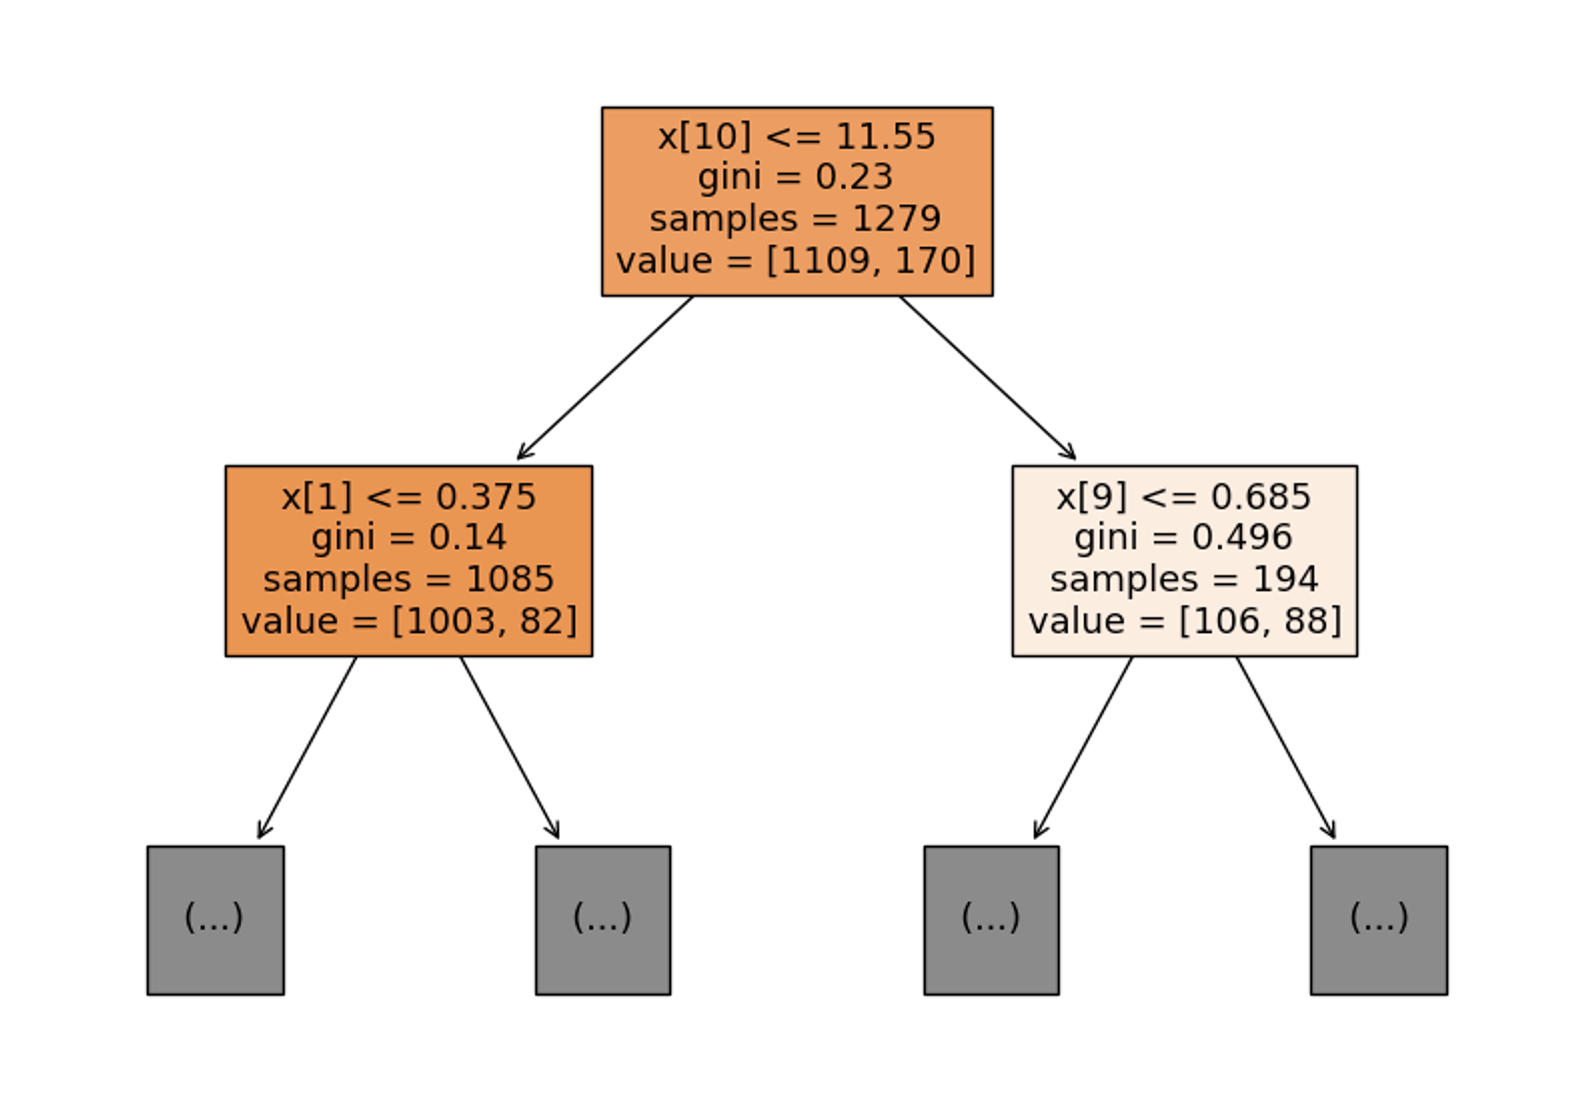

* 과적합을 방지하는 방법 - 가지치기
* 지니 불순도  = 1 - (타겟이 아닌 클래스 비율의 제곱 + 타겟 클래스 비율의 제곱)

의사결정나무의 장단점
* 직관적, 해석의 용이성
* 비선형적인 모델이고, 다양항 데이터 형태에서도 예측을 어느정도 수행할 수 있기 때문에 데이터의 선형성, 정규성, 등분산성이 필요하지 않아서 유용하게 사용할 수 있다.
* 실제 데이터셋이 편차가 큰 경우에는 사용이 쉽지 않고, 과적합이 쉽게 될 수 있습니다. 과적합을 방지하는 방법은 가지치기, 정보 획득량 Threshold 설정(예측값에 대한 기준) 한노드에 들어가는 최소 데이터수 제한, 노드의 최대깊이 제한 등

# 2. 랜덤 포레스트

# 딥러닝
* 이미지 및 비디오 처리
* 자연어 처리
* 게임 및 엔터테인먼트
* 금융
* 자율주행 자동차
* 에너지 관리
# 딥러닝 인공 신경망
# 텐서플로(TensorFlow)

In [18]:
import tensorflow as tf

# 상수로 텐서 만들기
a = tf.constant([1, 2, 3]) #constant(리스트)

# 0으로 채워진 텐서 만들기
b = tf.zeros([3, 3])  # 3*3   0으로 된 2차원 텐서

In [19]:
print(a)  #1차원 텐서는 (3, 빈칸)
print(b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [21]:
# 2. 텐서 연산
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])

# 덧셈
z = x + y

# 곱셈
w = x * y

print(z)
print(w)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


In [23]:
# 3. 텐서 형태 변경
x = tf.constant([[1, 2], [3, 4]])

# 형태를 [4]로 변경
y = tf.reshape(x, [4])

# 중요한 이유: pandas -> series 변환 해서 연산! 딥러닝도 연산할때 동일하게 작
print(x)
print(y)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 머신러닝에서 모델을 선택!
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
model

In [ ]:
# 머신러닝 모델의 옵션을 선택!
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

In [ ]:
pred = model.predict([5.0])
print(pred)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])
model.compile(loss='mse')

# 간단한 신경망 만들기

In [25]:
# 1) Neural Network 구성하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])


In [26]:
# 2) Neural Network 컴파일하기
model.compile(loss='mean_squared_error', optimizer='sgd')

In [27]:
# 3) Neural Network 훈련하기
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 570ms/step - loss: 4.8392
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 4.5414
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 4.2652
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 4.0090
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 3.7713
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 3.5508
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 3.3462
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 3.1563
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 2.9800
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 2.8164
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 2.6645
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 2.5235
Epoch 13/500
1/1 [==============================]

In [28]:
# 4) Neural Network 예측하기
pred = model.predict([5.0])
print(pred)

1/1 [==============================] - 0s 189ms/step
[[8.857958 8.871479 8.860318]]


#손실함수란?
* Mean Squared Error 손실 함수를 사용해서 모델의 손실값을 확인하는 과정

In [29]:
# 1) Neural Network 구성하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

In [30]:
# 2) Neural Network 컴파일하기
model.compile(loss='mse')

In [31]:
# 3) Neural Network 예측하기
pred = model.predict([0])
print(pred)

1/1 [==============================] - 0s 136ms/step
[[0. 0. 0.]]


In [32]:
# 4) Neural Network 손실 계산하기
model.evaluate([0], [[0, 1, 0]])

1/1 [==============================] - 0s 292ms/step - loss: 0.3333


0.3333333432674408

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

# Modify the code to display the plots directly

# Initialize the model
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

# Initial prediction and plot
pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.show()  # Display the plot
plt.clf()  # Clear the figure

# Training and plotting at intervals
epochs = 500
for i in range(1, epochs+1):
    model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
    pred = model.predict([1])

    if i % 25 == 0:
        plt.bar(np.arange(3), pred[0])
        plt.ylim(-1.1, 1.1)
        plt.xlabel('Output Node')
        plt.ylabel('Output')
        plt.text(-0.4, 0.8, 'Epoch ' + str(i))
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.clf()  # Clear the figure

# Print final predictions and weights
print(pred)
print(model.get_weights())

# 딥러닝 프로세스

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 레이어 (출력 레이어)
model = Sequential([
    Flatten(input_shape=(28, 28)), # 1. 28*28 행렬을 -> 1차원으로 변환 # 입력 레이어 -> 2차원 -> 1차원 변환
    Dense(128, activation='relu'), # 2. relu라는 옵티마이저 -> 128개의 은닉층으로 구성된 은닉레이어를 생성
    Dense(10, activation='softmax') # 3. 출력레이어 -> softmax 옵티마이저 -> 0~9까지의 숫자를 예측하는 것  여러가지를 분류할때 사용하는 softmax
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#모델 실행
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

#결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#결과 시각화 정리
import numpy as np

# 테스트 데이터를 사용하여 예측 수행
predictions = model.predict(x_test)

def display_prediction(index, predictions_array, true_label, img):
    plt.figure(figsize=(6,3))

    # 이미지 출력
    plt.subplot(1, 2, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[index], cmap=plt.cm.binary)

    # 예측 결과 출력
    predicted_label = np.argmax(predictions_array[index])
    if predicted_label == true_label[index]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array[index]),
                                         true_label[index]),
                                         color=color)

    # 예측 확률 막대그래프 출력
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions_array[index], color="#777777")
    plt.ylim([0, 1])
    plt.xticks(range(10))
    plt.ylabel('Prediction Probability')
    plt.xlabel('Predicted Value')

    plt.tight_layout()
    plt.show()

# 첫 번째 예측 결과 시각화
display_prediction(100, predictions, y_test, x_test)

# 두 번째 예측 결과 시각화 (실제로 코드를 실행할 수 있다면 이 부분을 주석 해제하여 실행하세요)
# display_prediction(1, predictions, y_test, x_test)

# 딥러닝 실습 (비정형-이미지) Mnist 패션데이터

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


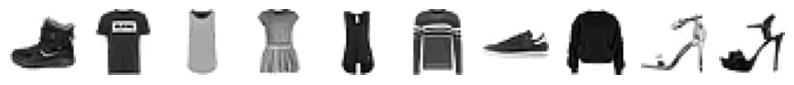

In [34]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

# 1. 데이터 로딩 및 탐색

# 데이터 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 형태 출력
print("Training data shape:", train_input.shape, train_target.shape)
print("Test data shape:", test_input.shape, test_target.shape)

# 처음 10개의 이미지를 시각화
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [35]:
# 처음 10개의 타겟 레이블 출력
print("First 10 training labels:", [train_target[i] for i in range(10)])

First 10 training labels: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


labels_and_names = [(label, class_names[label]) for label in train_target[:10]]
labels_and_names

[(9, 'Ankle boot'),
 (0, 'T-shirt/top'),
 (0, 'T-shirt/top'),
 (3, 'Dress'),
 (0, 'T-shirt/top'),
 (2, 'Pullover'),
 (7, 'Sneaker'),
 (2, 'Pullover'),
 (5, 'Sandal'),
 (5, 'Sandal')]

In [38]:
# 타겟 레이블의 고유한 값 및 각 레이블의 개수 출력
unique_targets, counts = np.unique(train_target, return_counts=True)
print("Unique target labels:", unique_targets)
print("Counts of each label:", counts)

Unique target labels: [0 1 2 3 4 5 6 7 8 9]
Counts of each label: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [39]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28, 28)

In [43]:
# 3. 모델 생성 및 컴파일

# 단순한 완전 연결 계층을 사용한 모델 생성
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 입력 데이터를 1D로 변환
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [47]:
# 4. 모델 학습
history = model.fit(train_scaled, train_target, epochs=5, validation_data=(test_input, test_target))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5876 - accuracy: 0.7991 - val_loss: 71.4856 - val_accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4661 - accuracy: 0.8414 - val_loss: 76.1320 - val_accuracy: 0.8201
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4450 - accuracy: 0.8497 - val_loss: 81.0310 - val_accuracy: 0.8286
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4335 - accuracy: 0.8533 - val_loss: 95.8671 - val_accuracy: 0.8139
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4269 - accuracy: 0.8556 - val_loss: 86.6762 - val_accuracy: 0.8239


In [48]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 86.6762 - accuracy: 0.8239


[86.67620086669922, 0.8238999843597412]

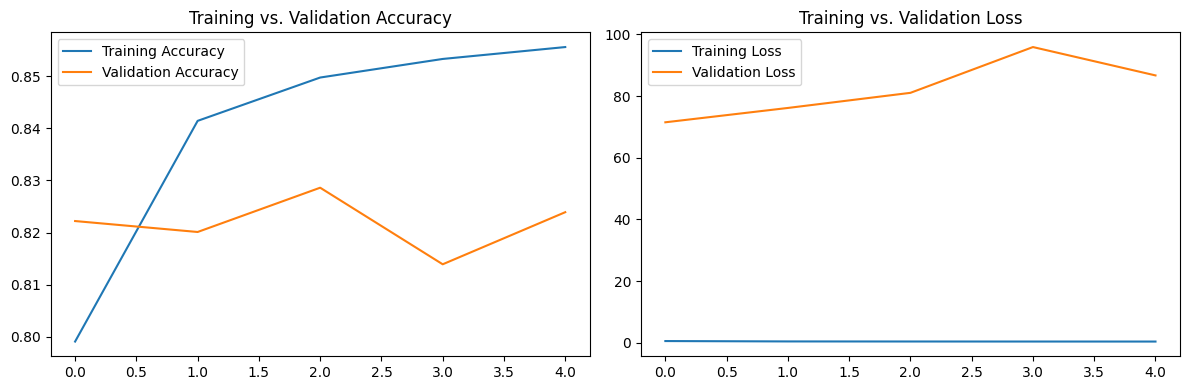

In [49]:
# 6. 결과 시각화

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()

# 은닉층을 추가해서 층이 2개라면?


In [50]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Fashion MNIST 데이터셋 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 정규화 및 1D로 변환
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [51]:
# 방법 1: Sequential API 사용하여 레이어 추가
# 모델 이름 변경: 공백을 제거하거나 밑줄(_)로 대체
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Add_Model')  # 이름 변경

model.summary()

Model: "Add_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# 방법 2: 모델 초기화 후 add() 메서드를 사용하여 레이어 추가
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [53]:
# 방법 3: Flatten 레이어를 추가하여 2D 입력을 1D로 변환
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Fashion MNIST 데이터셋 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 정규화 (1D로 변환하는 코드 제거)
train_scaled = train_input / 255.0

# 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [54]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 학습
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5240 - accuracy: 0.8194
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3928 - accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3536 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3256 - accuracy: 0.8824
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8880


In [55]:
model.evaluate(val_scaled, val_target)
#약 88%의 성능   성능이 약간 상승

375/375 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8742


[0.34614893794059753, 0.8742499947547913]

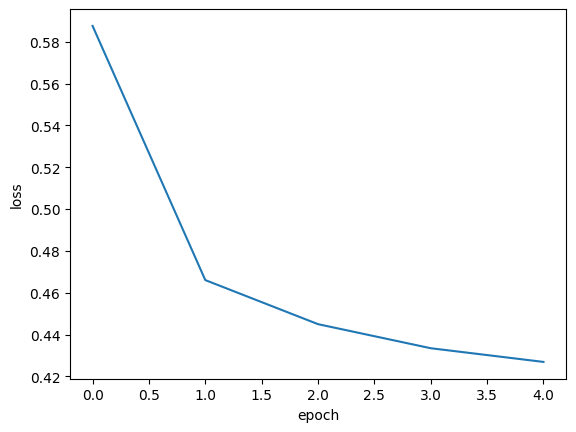

In [56]:
# 시각화!
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

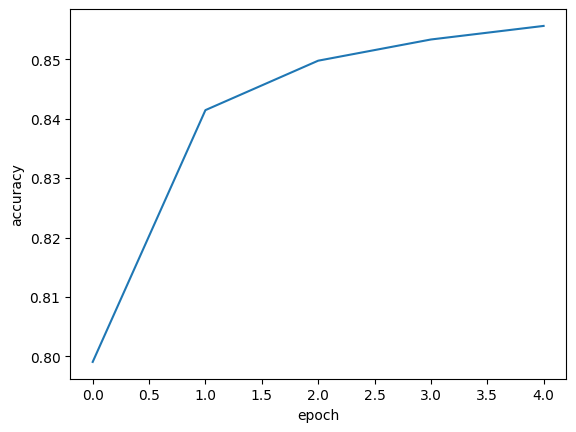

In [57]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

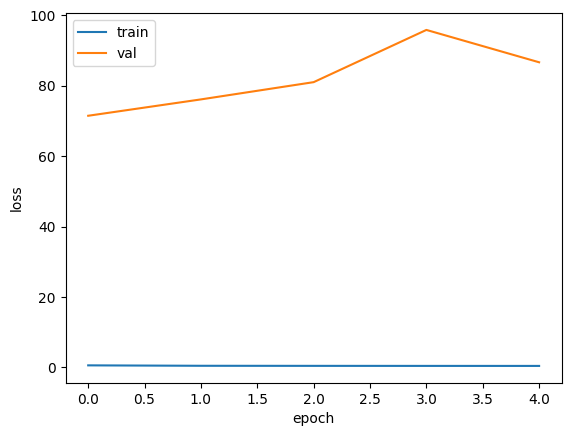

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃 - 과적합을 방지하기 위한 방법
* 드롭아웃 레이어를 모델에 추가하여 학습 중에 일부 뉴런을 무작위로 비활성화함으로써, 네트워크가 특정 뉴런에 과도하게 의존하는 것을 방지

In [ ]:
# 드롭아웃 레이어를 포함한 모델 정의
dropout_model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Dropout_Model')

# 모델 요약
dropout_model.summary()

# 모델 컴파일
dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 학습
history = dropout_model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

#교안 원래 모델 평가
loss, accuracy = model.evaluate(val_scaled, val_target)
print("Original Model - Loss:", loss, "Accuracy:", accuracy)

# 드롭아웃 모델 평가
dropout_loss, dropout_accuracy = dropout_model.evaluate(val_scaled, val_target)
print("Dropout Model - Loss:", dropout_loss, "Accuracy:", dropout_accuracy)

import matplotlib.pyplot as plt
# 모델 학습
history = dropout_model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))
# 학습 과정에서의 손실 값 그래프 시각화
plt.plot(history.history['loss'])  # 훈련 데이터의 손실 값
plt.plot(history.history['val_loss'])  # 검증 데이터의 손실 값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#모델 저장 및 복원

# 원래 모델과 드롭아웃 모델 저장
model.save("original_model.h5")
# 저장된 모델들을 불러오기
loaded_original_model = keras.models.load_model("original_model.h5")
# 불러온 모델의 요약 정보 출력
loaded_original_model.summary()

# 콜백 - 훈련 중 또는 훈련 후에 모델에 적용할 동작들을 정의할 수 있게 해주는 도구

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping 콜백 정의: 검증 손실이 10번의 에포크 동안 개선되지 않으면 훈련을 중지
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# ModelCheckpoint 콜백 정의: 각 에포크마다 모델의 가중치를 저장
checkpoint_cb = ModelCheckpoint("dropout_model_checkpoint.h5", save_best_only=True)

# 콜백을 사용하여 모델 학습
history = dropout_model.fit(
    train_scaled, train_target,
    epochs=100,  # 충분한 에포크 수 설정
    validation_data=(val_scaled, val_target),
    callbacks=[early_stopping_cb, checkpoint_cb]
)

# 이렇게 하면, 모델은 최대 100번의 에포크까지 훈련되지만,
# 검증 손실이 10번의 에포크 동안 개선되지 않으면 훈련이 조기 종료됩니다.
# 또한 각 에포크마다 모델의 가중치가 저장되며, 최적의 가중치만 최종적으로 저장됩니다.

In [ ]:
 # ReduceLROnPlateau - 콜백은 검증 손실이 개선되지 않을 때 학습률을 자동으로 감소시키는 역할

#TensorBoard  -시각화도구



In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os

# TensorBoard 로그 파일을 저장할 디렉토리 설정
log_dir = os.path.join("logs", "fit")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_scaled, train_target,
          epochs=100,
          validation_data=(val_scaled, val_target),
          callbacks=[reduce_lr, tensorboard_cb])

%load_ext tensorboard

%tensorboard --logdir=/content/logs/fit

# CNN 개념정리

In [61]:
# AutoKeras는 자동화된 기계 학습 (AutoML)을 위한 Keras 기반 라이브러리입
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
import autokeras as ak

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리: 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 데이터 전처리: 차원 확장 (AutoKeras에 맞게 4D로 만듦)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

# 모델 훈련
history = clf.fit(x_train, y_train, epochs=10)

# 모델 평가
print(clf.evaluate(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt

# 모델의 구성 출력
model = clf.export_model()
model.summary()

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# AutoML

* H2O 자체에서 제공하는 자체 클라이언트와 서버의 통신을 위한 초기화 함수, 자체 JVM(Java Virtual Machine) 기반의 서버를 사용하여 데이터 처리 및 모델링 작업을 수행

In [64]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=ac75af19d30796db8805816f86547526a5a980325f248c2725d22a7c0e25c9a9
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [65]:
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl9jd5x_q
  JVM stdout: /tmp/tmpl9jd5x_q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl9jd5x_q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_7rl9x3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [66]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv") # 고에너지 물리학에서 Higgs 보존 현상을 분류하는 데 사용

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
# 데이터 분할
train, test = data.split_frame([0.8])

# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

# AutoML 설정 및 실행       H2OAutoML은 H2O의 자동 기계 학습(AutoML) 도구
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [68]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20240124_62842     0.782612   0.557813  0.798886                0.317224  0.435324  0.189507
StackedEnsemble_BestOfFamily_2_AutoML_1_20240124_62842  0.779633   0.560901  0.794864                0.324831  0.436681  0.19069
StackedEnsemble_BestOfFamily_1_AutoML_1_20240124_62842  0.778093   0.562295  0.793952                0.3147    0.437398  0.191317
GBM_1_AutoML_1_20240124_62842                           0.776884   0.564338  0.79309                 0.31503   0.438116  0.191945
GBM_3_AutoML_1_20240124_62842                           0.770495   0.571823  0.785022                0.340244  0.441335  0.194777
GBM_2_AutoML_1_20240124_62842                           0.769984   0.573794  0.785976                0.33829   0.44215   0.195497
GBM_4_AutoML_1_20240124_62842                           0.758464   0.584619  0.77043       

In [69]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


# 보스턴 집값 데이터를 AutoML로

In [70]:
import h2o
from h2o.automl import H2OAutoML

# 1. H2O 초기화
h2o.init()

# 2. 데이터 로딩
data = h2o.import_file("/content/sample_data/california_housing_train.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_7rl9x3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.159 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [71]:
# 데이터의 기본 정보 및 처음 5행을 확인
data.describe()
data.head(5)

Rows:17000
Cols:9

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
type,real,real,int,int,int,int,int,real,int
mins,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
mean,-119.56210823529413,35.62522470588231,28.58935294117649,2643.664411764707,539.4108235294116,1429.573941176471,501.2219411764706,3.8835781000000007,207300.912352941
maxs,-114.31,41.95,52.0,37937.0,6445.0,35682.0,6082.0,15.0001,500001.0
sigma,2.0051664084261427,2.1373397946570862,12.586936981660404,2179.947071452767,421.49945157986474,1147.8529591595263,384.5208408559009,1.908156518379105,115983.76438720885
zeros,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
-114.47,34.4,19,7650,1901,1129,463,1.82,80100
-114.56,33.69,17,720,174,333,117,1.6509,85700
-114.57,33.64,14,1501,337,515,226,3.1917,73400
-114.57,33.57,20,1454,326,624,262,1.925,65500


In [74]:
# 3. 데이터 분할
# 'medv' 열은 보스턴 주택 데이터셋의 목표 변수 (주택의 중간 가격)
response = "median_house_value"
train, test = data.split_frame(ratios=[0.8])

In [75]:
# 4. AutoML 실행
# max_runtime_secs은 모델 학습에 허용된 최대 시간을 지정
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# 합성곱 연산,  Stride(스트라이드), Padding(패딩), Pooling